<a href="https://colab.research.google.com/github/aliahalotaibi73/week4_exercises/blob/main/Practice_Exercise_on_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Exercise on Artificial Neural Networks (ANN)

Welcome to the Practice Exercise on Artificial Neural Networks (ANN). In this exercise, we will focus on a classification task where the goal is to predict customer churn. We will work with a dataset to build, train, and evaluate ANN model. This practice will allow you to apply your understanding of neural networks to achieve the best performance.

---

## Dataset Overview

### **Dataset Name:** Telco Customer Churn

### **Description:**  
The dataset contains customer data from a telecommunications company and is used to predict customer churn. Churn refers to customers who stopped using the company's service within the last month. Each row represents a customer, and the dataset includes information about customer demographics, account information, and the services they have signed up for.

### **Features:**
The dataset contains the following columns:

- `customerID`: Unique identifier for the customer.
- `gender`: Gender of the customer (Male, Female).
- `SeniorCitizen`: Whether the customer is a senior citizen (1: Yes, 0: No).
- `Partner`: Whether the customer has a partner (Yes, No).
- `Dependents`: Whether the customer has dependents (Yes, No).
- `tenure`: Number of months the customer has stayed with the company.
- `PhoneService`: Whether the customer has phone service (Yes, No).
- `MultipleLines`: Whether the customer has multiple lines (Yes, No, No phone service).
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No).
- `OnlineSecurity`: Whether the customer has online security (Yes, No, No internet service).
- `OnlineBackup`: Whether the customer has online backup (Yes, No, No internet service).
- `DeviceProtection`: Whether the customer has device protection (Yes, No, No internet service).
- `TechSupport`: Whether the customer has tech support (Yes, No, No internet service).
- `StreamingTV`: Whether the customer has streaming TV service (Yes, No, No internet service).
- `StreamingMovies`: Whether the customer has streaming movies service (Yes, No, No internet service).
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling`: Whether the customer has paperless billing (Yes, No).
- `PaymentMethod`: The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- `MonthlyCharges`: The amount charged to the customer monthly.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Whether the customer churned (Yes, No).

### **Target Variable:**
- `Churn`: The variable that indicates whether a customer has churned or not.

## Importing Libraries

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Exploratory Data Analysis (EDA)

* **Inspect the dataset**: The first step is to load the dataset and examine its structure. You will look at the first few rows to ensure it has been correctly loaded and check for basic formatting issues.

* **Dataset structure**: Understand the structure of the dataset, including the number of rows, columns, and data types of each feature. This helps to identify categorical and numerical features and assess the need for data cleaning.

* **Summary statistics**: Generate summary statistics to better understand the distribution of numerical features. This includes measures like mean, median, standard deviation, minimum, and maximum values.

* **Check for missing values**: Identify any missing values in the dataset, as they can influence model performance.

* **Distribution of features**: Plot the distributions of numerical features to identify skewness, outliers, or unusual patterns.

* **Categorical feature analysis**: For categorical variables, count the frequency of each category.

* **Correlation matrix**: Generate a correlation matrix to understand relationships between numerical features.

* **Outlier detection**: Detect and visualize outliers, which can distort the training process. Outliers can be identified using box plots.

And add more as needed!


In [161]:
df = pd.read_csv('/content/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* from the info function wa can regonize that there is no missing values. Also, we have object columns we well encode them.

In [163]:
df.duplicated().sum()

0

In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [165]:
#count the frequency of gender category
df.gender .value_counts()

,count
gender,
Male,3555
Female,3488


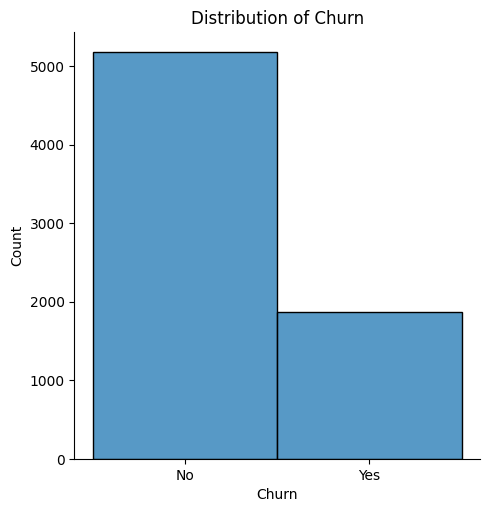

In [166]:
sns.displot(df['Churn'])
plt.title('Distribution of Churn')
plt.show()

* from the distribution above we can regonize that most of customer churned.


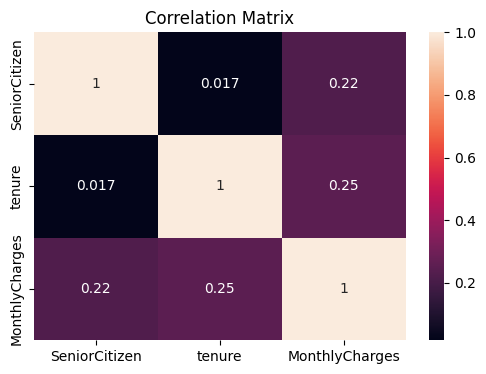

In [167]:
# Exclude non-numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

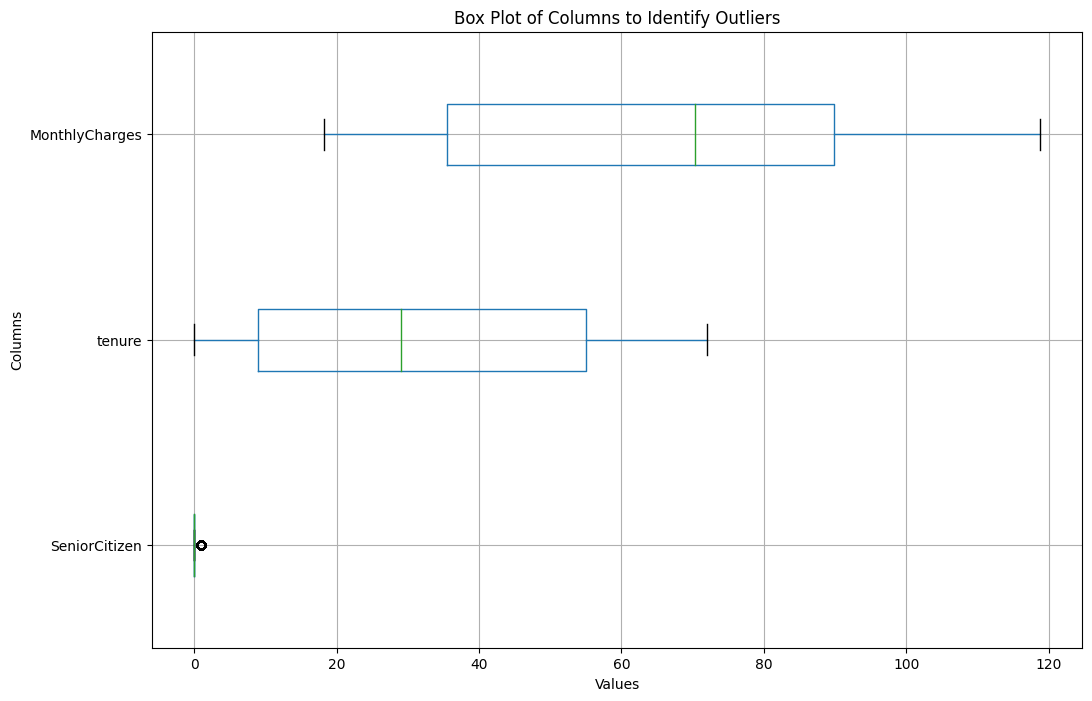

In [168]:
plt.figure(figsize=(12,8))
df.boxplot(vert=False)
plt.title('Box Plot of Columns to Identify Outliers')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

In [169]:
df.SeniorCitizen.value_counts()

,count
SeniorCitizen,
0,5901
1,1142


* from value count we can recognize that Senior citizen is imbalanced

In [170]:
df.MonthlyCharges.value_counts()

,count
MonthlyCharges,
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
...,...
23.65,1
114.70,1
43.65,1


* from box plot we can see there is outliers in MonthlyCharges, so if the value is greater than 100 is outliers

In [171]:
# List of columns to filter out values greater than 100
columns_to_filter = ['MonthlyCharges']

# Remove values greater than 100 in the specified columns
for column in columns_to_filter:
    df = df[df[column] <= 100]

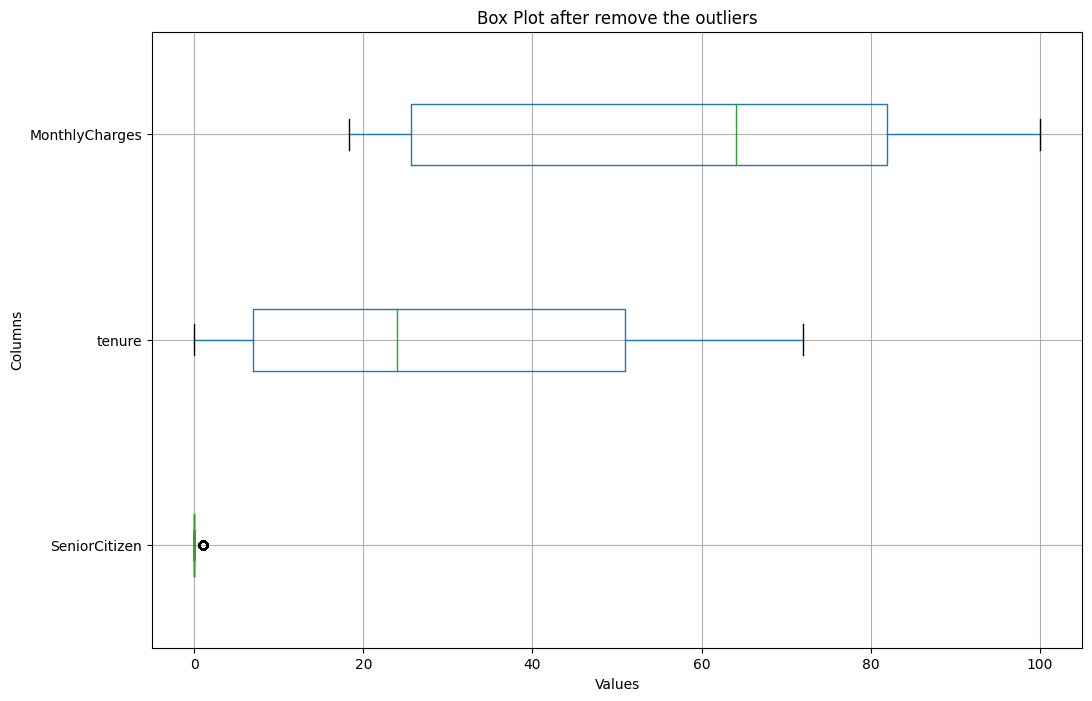

In [172]:
# box plot after remove the outliers
plt.figure(figsize=(12,8))
df.boxplot(vert=False)
plt.title('Box Plot after remove the outliers')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

## Data Preprocessing

* **Handling missing values**: If there are any missing values identified during EDA, you must decide how to handle them. Common strategies include removing rows or columns with missing values, or imputing them using methods like the mean, median, or a constant value.

* **Encoding categorical variables**: For machine learning models, categorical variables often need to be converted into numerical representations. Common techniques include:
   - **One-hot encoding**: Converts categorical variables into a series of binary columns.
   - **Label encoding**: Assigns a unique integer to each category.
   
* **Scaling and normalization**: Features often need to be scaled so that all of them contribute equally to the model. Two common techniques include:
   - **Standardization (Z-score scaling)**: Centers the data around a mean of 0 and standard deviation of 1. This is suitable for algorithms that assume normally distributed data, such as neural networks.
   - **Min-Max scaling (Normalization)**: Scales the data to a range (usually between 0 and 1). This technique is useful when the algorithm requires a bounded input range, such as in some neural networks.

* **Feature engineering**: In this step, new features can be created from the existing data to enhance the model’s predictive power. This may include combining features, applying mathematical transformations, or encoding domain-specific information.

* **Handling imbalanced data** (if applicable): If the dataset has imbalanced classes, it may be necessary to apply techniques such as:
   - **Oversampling** the minority class.
   - **Undersampling** the majority class.

And add more as needed!


In [173]:
label_encoder = LabelEncoder()
df['TotalCharges'] = label_encoder.fit_transform(df['TotalCharges'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])

In [174]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2413,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1423,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,151,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1359,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,898,1


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6141 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6141 non-null   object 
 1   gender            6141 non-null   int64  
 2   SeniorCitizen     6141 non-null   int64  
 3   Partner           6141 non-null   int64  
 4   Dependents        6141 non-null   int64  
 5   tenure            6141 non-null   int64  
 6   PhoneService      6141 non-null   int64  
 7   MultipleLines     6141 non-null   int64  
 8   InternetService   6141 non-null   int64  
 9   OnlineSecurity    6141 non-null   int64  
 10  OnlineBackup      6141 non-null   int64  
 11  DeviceProtection  6141 non-null   int64  
 12  TechSupport       6141 non-null   int64  
 13  StreamingTV       6141 non-null   int64  
 14  StreamingMovies   6141 non-null   int64  
 15  Contract          6141 non-null   int64  
 16  PaperlessBilling  6141 non-null   int64  
 17  

In [176]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['Churn', 'customerID'], axis=1))

In [177]:
df = df.drop('customerID', axis=1)

In [178]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1046,0,0,0,0,52,1,2,0,2,0,2,2,2,0,1,0,1,74.00,3154,0
1544,1,0,1,0,30,1,0,0,0,0,2,0,0,0,0,1,3,50.00,848,0
840,0,1,0,0,55,1,2,1,0,0,2,0,2,2,1,1,2,100.00,4243,1
4157,1,0,0,0,11,1,0,0,0,0,0,0,0,0,0,0,1,45.20,3908,0
6487,0,0,1,0,61,1,2,1,0,2,0,2,0,2,2,1,0,94.35,4349,0
4327,0,0,0,0,7,1,0,1,0,0,0,0,0,0,0,1,3,69.90,3938,0
4003,0,0,0,0,38,1,0,2,1,1,1,1,1,1,2,0,3,20.30,5077,0
482,0,1,0,0,20,1,0,1,0,0,0,0,0,2,0,1,2,81.45,1120,0
3386,0,0,1,0,58,1,2,0,2,0,0,2,0,2,1,1,2,68.40,3223,0
2881,0,0,1,0,31,1,0,0,2,0,0,2,0,2,1,1,2,64.00,1469,0


In [179]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [180]:
# Splitting the dataset into the Training set and Test set, random_state=42 for reproducibility, test_size=0.2 means 20% of the dataset will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
# apply Over-Sampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [182]:
# Define the model
model = Sequential()

In [213]:
X_resampled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2413
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1423
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,151
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1359
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,898


In [200]:
from tensorflow.keras.initializers import HeNormal

In [214]:
#input layer
model.add(Dense(units=64, input_dim=X_resampled.shape[1], kernel_initializer=HeNormal(),activation='relu' ))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [215]:
#hidden layer
model.add(Dense(units=32,activation='relu' ))

In [216]:
#output layer, I used sigmoid because it is sutiable for binary classification
model.add(Dense(units=1, activation='sigmoid'))

In [217]:
# I used Binart_crossentropy because we have a classification proplem and we want to predict Churn with to classes (yes,no)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metric.

In [218]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,882 (30.79 KB)

 Trainable params: 7,882 (30.79 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [221]:
history = model.fit(X_resampled, y_resampled, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7994 - loss: 0.4213 - val_accuracy: 0.8475 - val_loss: 0.4507
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7977 - loss: 0.4264 - val_accuracy: 0.8370 - val_loss: 0.4539
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8017 - loss: 0.4079 - val_accuracy: 0.8392 - val_loss: 0.4470
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7982 - loss: 0.4257 - val_accuracy: 0.8420 - val_loss: 0.4237
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4346 - val_accuracy: 0.8840 - val_loss: 0.4089
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8034 - loss: 0.4306 - val_accuracy: 0.8331 - val_loss: 0.4895
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8012 - loss: 0.4208 - val_accuracy: 0.8403 - val_loss: 0.4534
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8025 - loss: 0.4159 - val_accuracy: 0.

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [222]:
model.evaluate(X_test, y_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.3851


[0.40505239367485046, 0.8104149699211121]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

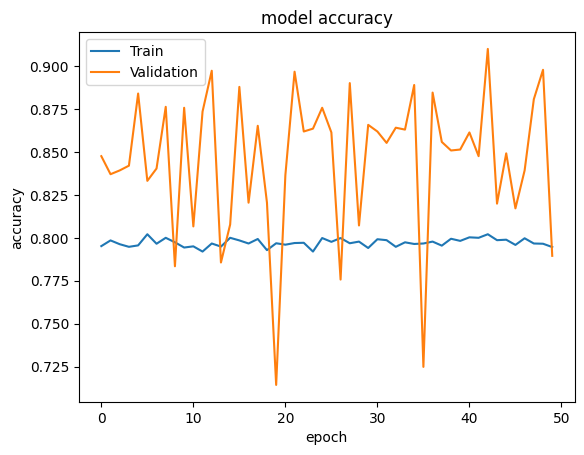

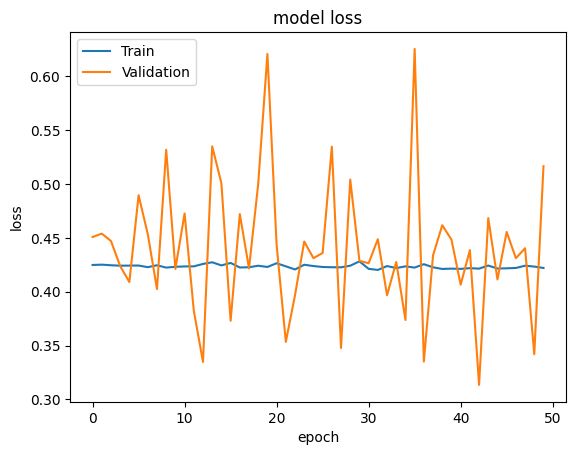

In [223]:
# For accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# For loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Save the Model
Save the trained model for submission.

In [226]:
model.save('model.h5')